## **Definição do problema**

* Realizar a previsão da taxa média de ocupação de casas em Boston, Estados Unidos. 

* A base de dados a ser utilizada pode ser encontrada no seguinte link:
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

* Segundo o site mencionado, a base de dados é constituída por um total de 14 variáveis, sendo 12 variáveis numéricas e somente 1 variável categórica. Além de possuir 506 linhas de observações de dados. 

* Por se tratar de um problema de previsão e a base de dados possuir uma variável target o objetivo aqui está em construir um algoritmo de regressão linear simples para realizar a previsão da taxa média de ocupação das casas pelos proprietários em Boston.



In [ ]:
# Importação das bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

# Ignorando os avisos de warning
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Carregamento da base de dados utilizando sklearn
from sklearn.datasets import load_boston
boston = load_boston()

## **Análise Exploratória dos dados**





In [ ]:
# Armazenando a base de dados em um Dataframe
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [ ]:
dataset.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [ ]:
# Realizando o cálculo da média da variável target
media_esperada_target = dataset['target'].mean()
media_esperada_target

22.532806324110698

Com base no valor médio da variável alvo espera-se que os resultados previstos pelo modelo estejam próximos desse valor.

* Valor médio da base de dados: 22.53

## **Escolha da variável a ser utilizada**

* Para aplicar esse método foi escolhida a variável explanatória RM que informa o número médio de quartos nas casas.

* Será feita uma análise da relação entre a variável target e a variável escolhida antes de iniciar a construção do modelo.

In [ ]:
# Cálculo do Desvio Padrão
calc_desvio_padrao = np.std(dataset['RM'])
print('Desvio Padrão: %0.8f' % calc_desvio_padrao) 

Desvio Padrão: 0.70192251


In [ ]:
# Cálculo da Correlação entre as variáveis RM e Target
from scipy.stats import pearsonr
correlacao = pearsonr(dataset['RM'], dataset['target'])[0]
print('Correlação obtida: %0.8f' % correlacao)

Correlação obtida: 0.69535995


Com base no resultado obtido pelo cálculo da correlação pode-se afirmar que existe uma forte correlação positiva entre as variáveis RM e Target, ou seja, conforme o valor da variável RM aumenta, existe probabilidade da variável Target aumentar também.

* Valor obtido do cálculo da correlação: 0.69535995

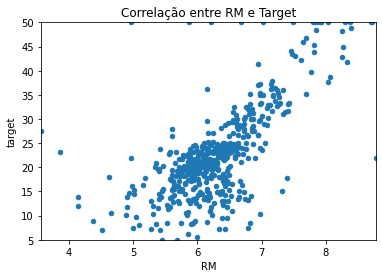

In [ ]:
 # Plotando um gráfico para demonstrar a correlação positiva entre as variáveis

X_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()] 

graf = dataset.plot(kind='scatter', x = 'RM', y = 'target', title = 'Correlação entre RM e Target', xlim = X_range, ylim = y_range)

## **Modelo de Regressão Linear Simples utilizando a biblioteca StatsModels**

* Esse pacote traz definições estatísticas em python.

In [ ]:
# Importação do pacote API do StatsModels

import statsmodels.api as sm 

In [ ]:
# Organizando os dados 

X = dataset['RM']
y = dataset['target']

In [ ]:
# Por requisição do pacote utilizado é dado o comando abaixo para atribuir constantes aos valores de X que serão alteradas durante o treinamento.

X = sm.add_constant(X)

In [ ]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [ ]:
# Criação do modelo de regressão linear simples 

modelo = sm.OLS(y, X)

In [ ]:
# Treinando o modelo

modelo_v1 = modelo.fit()

In [ ]:
# Exibindo o resultado do treinamento do modelo

print(modelo_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           2.49e-74
Time:                        04:57:18   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

O valor do R-squared determina a precisão do modelo. Esse parâmetro vai de 0 à 1 e quanto maior for significa que o modelo entendeu como trabalhar com os dados. 

Nesse caso o valor foi de 0.484, o que significa que o modelo não está tão bom.

In [ ]:
# Valor dos parâmetros da fórmula da regressão linear:
# y = a + bx

modelo_v1.params

const   -34.670621
RM        9.102109
dtype: float64

In [ ]:
# Gerando os valores previstos pelo modelo utilizando a base de dados de treino

valores_previstos = modelo_v1.predict(X)
valores_previstos

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [ ]:
# Realizando a previsão de um valor novo

new_RM = 5
Xp = np.array([1, new_RM])
print(modelo_v1.predict(Xp))

[10.83992413]


Portanto ao inserir o valor 5 no modelo ele determinou que o valor resultante será de 10.8.

Com base no resultado obtido pelo modelo pode-se interpretar que em uma casa com um total de 5 quartos a mediana da taxa de ocupação é de 10.8.

## **Gerando um gráfico do tipo ScatterPlot com a linha de regressão**


In [ ]:
# Determinando o range dos valores de X e Y para o gráfico
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]

Criando o gráfico conforme as suas camadas

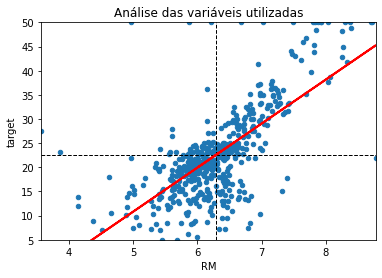

In [ ]:
# Camada 1, composta pelos dados a serem analisados

scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', title = 'Análise das variáveis utilizadas', xlim = x_range, ylim = y_range)

# Camada 2, composta pelas médias das variáveis

mean_Y = scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color = 'black', linewidth = 1)
mean_X = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color = 'black', linewidth = 1)  

# Camada 3, composta pela linha de regressão

regression_line = scatter_plot.plot(dataset['RM'], valores_previstos, '-', color = 'red', linewidth = 2)

Gerando os resíduos obtidos, ou seja, a diferença entre os valores obtidos e os valores reais para determinar a taxa de erros.

In [ ]:
# Normalizando o valor dos resíduos
from sklearn import preprocessing

residuos = dataset['target'] - valores_previstos
residuos_normalizados = preprocessing.scale(residuos)

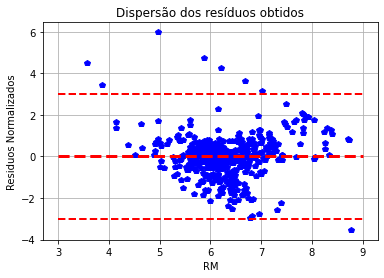

In [ ]:
# Gerando um gráfico com os resíduos

residual_scatter_plot = plt.plot(dataset['RM'], residuos_normalizados, 'bp')
plt.xlabel('RM')
plt.ylabel('Residuos Normalizados')
plt.title('Dispersão dos resíduos obtidos')

mean_residos = plt.plot([int(x_range[0]), round(x_range[1], 0)], [0,0], '--', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [-3,-3], '--', color = 'red', linewidth = 2)

plt.grid()

Com base no gráfico de dipersão dos resíduos observa-se que o modelo obteve uma taxa relevante de resíduos, ou seja, os valores obtidos não foram muito satisfatórios pois possuem uma alta taxa de diferença se comparados aos valores alvo.

 ## **Modelo de Regressão Linear Simples utilizando a biblioteca Scikit-Learn**

* Esse pacote possui um conjunto de modelos de aprendizado de máquina em python.

In [ ]:
# Importanto a biblioteca

from sklearn import linear_model

In [ ]:
# Criando o modelo

modelo_v2 = linear_model.LinearRegression(normalize = False, fit_intercept = True) 
# Normalize false porque nao quero normalizar os dados e fit intercept true porque eu quero todos os parâmetros utilizados

In [ ]:
# Definindo os valores de X e Y

num_linhas = len(dataset)
X = dataset['RM'].values.reshape((num_linhas, 1)) # O valor de X deve ser sempre uma matriz, por isso ocorreu o reshape
y = dataset['target'].values # Y pode ser um vetor mesmo

In [ ]:
# Treinando o modelo

modelo_v2.fit(X,y)

LinearRegression(normalize=False)

In [ ]:
# Coeficientes obtidos

print(modelo_v2.coef_)
print(modelo_v2.intercept_)

[9.10210898]
-34.67062077643857


In [ ]:
# Previsões feitas da base de dados utilizada no treino

print(modelo_v2.predict(X))

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.58705086
 20.53367019 22.17204981 22.42690886 22.54523628 22.48152152 21.21632837
 22.05372239 18.79516738 26.55926634 25.57623857 22

In [ ]:
# Prevendo um novo valor a partir do modelo treinado

RM = 5
Xp = np.array(RM).reshape(-1, 1)
print(modelo_v2.predict(Xp))

[10.83992413]


Portanto ao atribuir o valor de 5 para o modelo foi obtido um resultado de 10.83. Ou seja, caso o número de quartos seja 5, o modelo prevê que a mediana da taxa de ocupação da casa é de 10.83.

 ## **Comparando os modelos criados**

* Ambos os modelos resultaram em valores iguais ao receber o valor de RM = 5.

* Agora será feita uma análise dos dois modelos criados com base em sua performance.

In [ ]:
# Criação de uma massa de dados própria para a regressão
from sklearn.datasets import make_regression

HX, Hy = make_regression(n_samples = 10000000, n_features = 1, n_targets = 1, random_state = 101)
# n_samples significa o número de exemplos, n_features significa o número de features a serem inseridas no modelo, n_targets seria o número de saídas e random_state para os valores serem criados randomicamente

In [ ]:
# Treinando o modelo linear da biblioteca StatsModels com a massa de dados criada

# time serve para exibir o tempo de treinamento do modelo
%%time 
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

CPU times: user 1.43 s, sys: 536 ms, total: 1.97 s
Wall time: 1.55 s


In [ ]:
# Treinando o modelo linear da biblioteca Scikit-Learn com a massa de dados criada

%%time
sk_linear_regression = linear_model.LinearRegression(normalize = False, fit_intercept = True)
sk_linear_regression.fit(HX, Hy)

CPU times: user 355 ms, sys: 73.4 ms, total: 428 ms
Wall time: 352 ms


Observa-se que o modelo criado pela biblioteca Scikit-Learn obteve um tempo menor de treinamento em comparação ao modelo criado pela biblioteca StatsModels. Portanto pode-se afirmar que este modelo performa melhor quando o quesito de comparação é o tempo de processamento.

Porém deve-se ter em mente que caso se deseje uma maior interpretação estatística do modelo a biblioteca StatsModels oferece uma saída com muitas informações relevantes. 
Mas caso seja necessário um menor tempo de processamento então a biblioteca Scikit-Learn é uma melhor opção.

 ## **Cost-Function de um modelo de Regressão Linear**

* Como o objetivo da regressão linear é determinar uma reta que minimize a soma dos erros ao quadrado obtidos pelo cálculo da diferença entre os valores obtidos do modelo e os valores alvo então deve-se buscar métodos para a minimização da função de custo. 

* Alguns métodos que cumprem essa função são os seguintes: 
* Pseudo-inversão
* Fatorização
* Gradient Descent

 ## **Minimizando a Cost Function**

### Minimizando a Cost Function utilizando Pseudo-Inversão

In [ ]:
# Definindo os valores de X e Y

num_observ = len(dataset)
X = dataset['RM'].values.reshape((num_observ, 1))
Xb = np.column_stack((X, np.ones(num_observ)))
y = dataset['target'].values

In [ ]:
# Função para equações normais com base na fórmula da pseudo-inversão

def normal_equations(X, y):
  return np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

In [ ]:
# Coeficientes da regressão linear simples

print(normal_equations(Xb, y))

[  9.10210898 -34.67062078]


### Aplicando o Gradiente Descendente

In [ ]:
# Definindo X e Y

observations = len(dataset)
X = dataset['RM'].values.reshape((observations, 1))
X = np.column_stack((X, np.ones(observations)))
y = dataset['target'].values

In [ ]:
# Definindo as funções com a matemática do Gradiente Descendente

import random

# Função com valores randômicos para os coeficientes iniciais, ou seja, para os pesos iniciais
def random_w(p):
  return np.array([np.random.normal() for j in range(p)])

# Cálculo da hipotese, ou seja, do valor aproximado de y previsto pelo cálculo de X com o peso W
def hypothesis(X, w):
  return np.dot(X, w)

# Cálculo da função de perda (erro)
def loss(X, w, y):
  return hypothesis(X, w) - y

def squared_loss(X, w, y):
  return loss(X, w, y) ** 2

# Cálculo do gradiente 
def gradient(X, w, y):
  gradients = list()
  n = float(len(y))
  for j in range(len(w)):
    gradients.append(np.sum(loss(X, w, y) * X[:, j])/ n) # Cálculo dos gradientes com base na fórmula matemática
  return gradients

# Atualização do valor dos coeficientes
def update(X, w, y, alpha = 0.01):
  return [t - alpha*g for t, g in zip(w, gradient(X, w, y))]

# Otimizando o modelo
def optimize(X, y, alpha = 0.01, eta = 10 ** -12, iterations = 1000):
  w = random_w(X.shape[1])
  path = list()
  for k in range(iterations):
    SSL = np.sum(squared_loss(X, w, y))
    new_w = update(X, w, y, alpha = alpha)
    new_SSL = np.sum(squared_loss(X, new_w, y))
    w = new_w
    if k >= 5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
      path.append(new_SSL)
      return w, path
    if k % (iterations / 20) == 0:
      path.append(new_SSL)
  return w, path

In [ ]:
# Definindo o valor da taxa de aprendizado

alpha = 0.048

In [ ]:
# Otimizando a Cost Function

w, path = optimize(X, y, alpha, eta = 10**-12, iterations = 25000)

Imprimindo os resultados

In [ ]:
# Resultados obtidos dos coeficientes

print('Valor final dos coeficientes: %s' % w)

Valor final dos coeficientes: [9.102103817693239, -34.67058793088799]


In [ ]:
# Resultados obtidos do erro quadrado durante o processamento

print('Valores obtidos para o erro quadrado:\n\n %s' % path)

Valores obtidos para o erro quadrado:

 [420976.45147988026, 23889.96350829116, 22493.597706004377, 22163.833395187183, 22085.956594917046, 22067.565289911105, 22063.22201824806, 22062.19631568194, 22061.954086819507, 22061.896882300643, 22061.88337294034, 22061.880182583714, 22061.879429152374, 22061.879251222806, 22061.879209203144, 22061.87919927982, 22061.87919693634, 22061.879196382906, 22061.87919625221, 22061.879196221344, 22061.879196218528]
